1. Tag statistics: the most frequent tags appreared;
2. Are there any books that people tend to tag and not to tag? What are those books?
3. Tag co-occurrence
4. 

In [37]:
import pandas as pd
import os
from collections import Counter
from itertools import combinations

In [25]:
en_path = "../Data/Reviews_Scraped/En/"
tag_file = "../Data/tags.csv"

In [30]:
tags = []

header_written = False if not os.path.exists(tag_file) else True

for file in os.listdir(en_path):
    if file.endswith(".csv"):
        df = pd.read_csv(en_path + file)
        for index, row in df.iterrows():
            try:
                df.at[index, 'shelves'] = eval(row['shelves'])
            except Exception as e:
                print(f"Error in file: {file}, row: {index}")
                print(f"Row data: {row['shelves']}")
                print(f"Error message: {e}")
        
        for i in range(len(df)):
            tags.extend(df.loc[i, 'shelves'])

        with open(tag_file, 'a') as f:
            if not header_written:
                df[['shelves']].to_csv(f, index=False, header=True)
                header_written = True
            else:
                df[['shelves']].to_csv(f, index=False, header=False)

print(f"Tag information has been saved to {tag_file}")


Tag information has been saved to ../Data/tags.csv


In [31]:
print(f"Total tag numbers: {len(tags)}")
print(f"Unique tags numbers: {len(set(tags))}")

Total tag numbers: 32774
Unique tags numbers: 6482


In [22]:
tag_counter = Counter(tags)
tag_counter = dict(sorted(tag_counter.items(), key=lambda item: item[1], reverse=True))
tag_counter

{'graphic-novels': 3023,
 'graphic-novel': 2348,
 'biography': 1394,
 'non-fiction': 1124,
 'comics': 1061,
 'history': 1044,
 'nonfiction': 851,
 'memoir': 513,
 'favorites': 364,
 'graphic': 289,
 'adult': 269,
 'historical': 259,
 'biography-memoir': 252,
 '2017': 252,
 'comics-graphic-novels': 226,
 'art': 216,
 '2020': 211,
 '2019': 187,
 'library': 185,
 '2018': 168,
 'graphic-novels-comics': 168,
 '2023': 149,
 '2022': 146,
 'historical-fiction': 141,
 '2021': 140,
 'young-adult': 140,
 'comics-and-graphic-novels': 124,
 'netgalley': 116,
 'autobiography': 115,
 'civil-rights': 113,
 'graphic-novels-and-comics': 111,
 'ya': 111,
 'american-history': 108,
 'memoirs': 107,
 'african-american': 107,
 '2016': 99,
 'arc': 98,
 'biographies': 90,
 'comic': 84,
 '2024': 83,
 'biographical': 77,
 'comic-books': 77,
 'own': 76,
 'music': 70,
 'owned': 69,
 'graphics': 68,
 'true-crime': 67,
 'crime': 66,
 'books-i-own': 65,
 '2015': 64,
 'library-book': 63,
 'graphicnovels': 62,
 'book-c

In [24]:
tag_counter_path = "../Data/tag_counter.csv"

tag_df = pd.DataFrame(list(tag_counter.items()), columns=['tag', 'frequency'])
tag_df.to_csv(tag_counter_path, index=False)

In [45]:
tagsAll = pd.read_csv(tag_file)
tagsAll = tagsAll['shelves'].apply(eval)
tagsAll = tagsAll.tolist()

cooccur = {}

for tagList in tagsAll:
    if len(tagList) < 2:
        continue
    
    # calculate tag co-occurrence with combination
    for pair in combinations(tagList, 2):
        if pair in cooccur:
            cooccur[pair] += 1
        else:
            cooccur[pair] = 1

tagSet = list(tag_counter.keys()) # get unique tags with sorted in frequency
coMatrix = pd.DataFrame(index=tagSet, columns=tagSet, data=0)

for (tag1, tag2), freq in cooccur.items():
    coMatrix.at[tag1, tag2] = freq
    coMatrix.at[tag2, tag1] = freq

coMatrix.iloc[:10, :10]

,graphic-novels,graphic-novel,biography,non-fiction,comics,history,nonfiction,memoir,favorites,graphic
graphic-novels,0,0,270,274,41,288,188,144,51,0
graphic-novel,0,0,336,243,20,267,205,182,19,2
biography,270,336,0,65,170,161,57,13,27,47
non-fiction,274,243,65,0,84,60,0,39,9,34
comics,41,20,170,84,0,115,61,27,17,1
history,288,267,161,60,115,0,40,81,12,37
nonfiction,188,205,57,0,61,40,0,54,12,14
memoir,144,182,13,39,27,81,54,0,7,16
favorites,51,19,27,9,17,12,12,7,0,2
graphic,0,2,47,34,1,37,14,16,2,0


In [46]:
coMatrix_path = "../Data/tag_coMatrix.csv"
coMatrix.to_csv(coMatrix_path)

In [49]:
# Tag co-occurrence matrix with tags appeared at least 10 times

coMatrixShort = coMatrix.loc[tagSet[:314], tagSet[:314]]
coMatrixShort_path = "../Data/tag_coMatrix_short.csv"
coMatrixShort.to_csv(coMatrixShort_path)

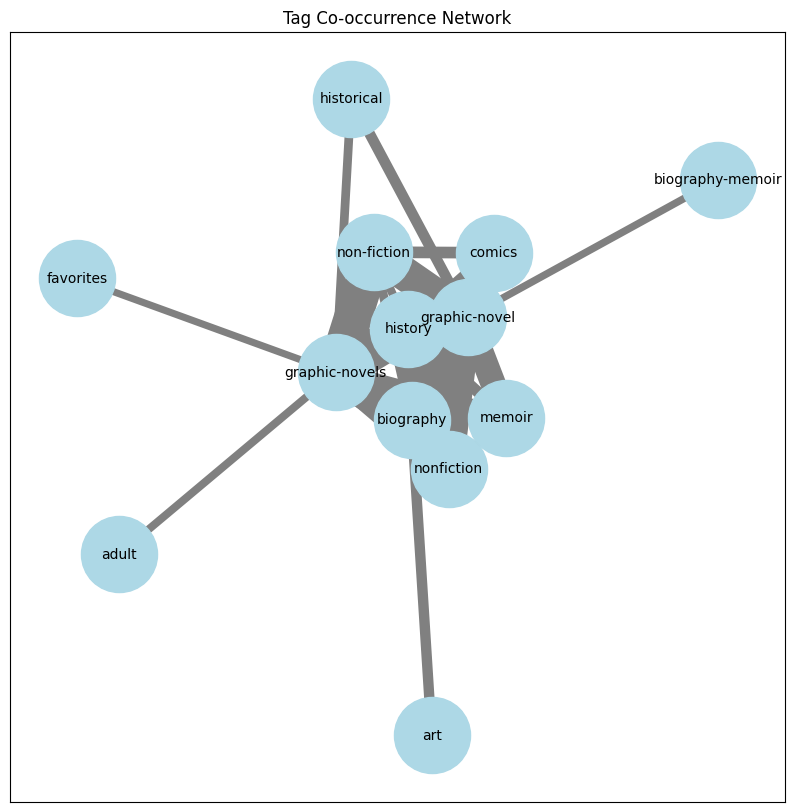

In [54]:
import networkx as nx
import matplotlib.pyplot as plt

# undirected graph
G = nx.Graph()

# add nodes and edges
for (tag1, tag2), count in cooccur.items():
    if count > 50:  # co-occurrence times > 50 only
        G.add_edge(tag1, tag2, weight=count)

# Graph layout
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  # nodes layout
nx.draw_networkx(G, pos, with_labels=True, node_size=3000, font_size=10, node_color="lightblue", edge_color="gray", width=[d['weight']*0.1 for (u, v, d) in G.edges(data=True)])

plt.title("Tag Co-occurrence Network")
plt.show()